In [10]:
import math

def calc_lenght(a: list) -> float:
    length: float = 0
    for coord in a:
        length += coord ** 2
    return math.sqrt(length)

def normalise(a: list) -> list:
    lenght: float = calc_lenght(a)
    for i in range(len(a)):
        a[i] /= lenght
    return a

def dot(a: list, b: list) -> float:
    if(len(a) != len(b)): return float('nan')
    dotpr: float = 0
    for i in range(len(a)):
        dotpr += a[i] * b[i]
    return round(dotpr, 10)

def mult(a: list, b: float) -> list:
    x = a[0] * b
    y = a[1] * b
    z = a[2] * b

    return[x, y, z]

def minus(a: list, b: list) -> list:
    x = a[0] - b[0]
    y = a[1] - b[1]
    z = a[2] - b[2]

    return[x, y, z]

def cross(a: list, b: list) -> list:
    x = a[1]*b[2] - a[2]*b[1]
    y = a[2]*b[0] - a[0]*b[2]
    z = a[0]*b[1] - a[1]*b[0]
    
    return[x, y, z]

def rotate_z(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) - a[1] * math.sin(rad)
    y: float = a[0] * math.sin(rad) + a[1] * math.cos(rad)
    z: float = a[2]

    return [x, y, z]

def rotate_y(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) + a[2] * math.sin(rad)
    y: float = a[1]
    z: float = -a[0] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]

def rotate_x(a: list, rad: float) -> list:
    x: float = a[0]
    y: float = a[1] * math.cos(rad) - a[2] * math.sin(rad)
    z: float = a[1] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]

In [11]:
def fresnelPar(eta_2: float, theta: float) -> float:
    eta_1: float = 1
    cos_gamma_i: float = math.cos(theta)

    a: float = ((eta_1 / eta_2) * math.sin(theta))
    b: float = a * a

    if (b > 1): return 1

    cos_gamma_t: float = math.sqrt(1 - b)

    R: float = (eta_2 * cos_gamma_i - eta_1 * cos_gamma_t) / (eta_2 * cos_gamma_i + eta_1 * cos_gamma_t)

    return min(1, R * R)

def fresnelPer(eta_2: float, theta : float) -> float:
    eta_1: float = 1
    cos_gamma_i: float = math.cos(theta)

    a: float = ((eta_1 / eta_2) * math.sin(theta))
    b: float = a * a

    if (b > 1): return 1

    cos_gamma_t: float = math.sqrt(1 - b)

    R: float = (eta_1 * cos_gamma_i - eta_2 * cos_gamma_t) / (eta_1 * cos_gamma_i + eta_2 * cos_gamma_t)

    return min(1, R * R)


def fresnel(eta_parallel : float, eta_perpendic : float, theta : float) -> float:
    return 0.5 * (fresnelPer(eta_perpendic, theta) + fresnelPar(eta_parallel, theta))

def fresnel2(eta : float, x: float) -> float:
    F_0: float = pow(1 - eta, 2) / pow(1 + eta, 2)
    return F_0 + (1 - F_0) * pow(1 - x, 5)

In [12]:
epsilon = 0.00001

def sign(x: float) -> int:
    if x > 0: return 1
    if x < 0: return -1
    return 0


def LinearSolver(a: float, b: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'), float('nan'), float('nan')]

    if (abs(a) > epsilon):
        roots[0] = -b / a
        roots[3] = 1

    return roots


def QuadraticSolver( a: float,  b: float ,  c: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'),float('nan'), float('nan')]

    if (abs(a) < epsilon): return LinearSolver(b, c)

    else:
        D : float = b * b - 4 * a * c

        if (abs(D) < epsilon):
            roots[0] = -b / (2 * a)
            roots[1] = -b / (2 * a)
            roots[3] = 2

        elif (D > 0):
            delta: float = math.sqrt(D)
            roots[0] = (-b + delta) / (2 * a)
            roots[1] = (-b - delta) / (2 * a)
            roots[3] = 2

    return roots


def NormalizedCubicSolver(A: float,  B: float, C: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'),float('nan'), float('nan')]

    if (abs(C) < epsilon):
        roots = QuadraticSolver(1, A, B)
        roots[int(roots[3])] = 0
        roots[3] += 1

    else:
        Q: float = (3 * B - A * A) / 9
        R: float = (9 * A * B - 27 * C - 2 * A * A * A) / 54
        D: float = Q * Q * Q + R * R

        if (D > 0):
            sqrtD: float = math.sqrt(D)
            s: float = sign(R + sqrtD) * pow(abs(R + sqrtD), 1.0 / 3.0)
            t: float = sign(R - sqrtD) * pow(abs(R - sqrtD), 1.0 / 3.0)

            roots[0] = (-A / 3 + (s + t))
            roots[3] = 1
        
        else:
            theta: float = math.acos(R / math.sqrt(-(Q * Q * Q)))
            sqrtQ: float = math.sqrt(-Q)
            roots[0] = (2 * sqrtQ * math.cos(theta / 3) - A / 3)
            roots[1] = (2 * sqrtQ * math.cos((theta + 2 * math.pi) / 3) - A / 3)
            roots[2] = (2 * sqrtQ * math.cos((theta + 4 * math.pi) / 3) - A / 3)
            roots[3] = 3
        
    return roots


def cubic_solver(a: float, b: float, c: float, d: float) -> list:
    if (abs(a) < epsilon):
        return QuadraticSolver(b, c, d)
    
    else:
        return NormalizedCubicSolver(b / a, c / a, d / a)

In [13]:
def T(absorb : float, gamma_t : float) -> float:
    l : float = 1 + math.cos(2 * gamma_t)
    return math.exp(-2 * absorb * l)

def absorption(absorb: float, p: int, h: float, eta_parallel: float,  eta_perpendic: float, theta: float) -> float:
    gamma_i: float = math.asin(h)

    if (p == 0):
        return fresnel(eta_parallel, eta_perpendic, gamma_i)
    
    gamma_t : float = math.asin(h / eta_perpendic)
    fres : float= fresnel(eta_parallel, eta_perpendic, gamma_i)
    inv_fres: float = fresnel(1 / eta_parallel, 1 / eta_perpendic, gamma_t)

    t : float= T(absorb, gamma_t)

    return (1 - fres) * (1 - fres) * pow(inv_fres, p - 1) * pow(t, p)
    '''
    gamma_t : float = math.asin(h / eta_perpendic)
    fres : float = fresnel(eta_parallel, eta_perpendic, math.cos(theta) * math.sqrt(1 - (h * h)))
    t : float = T(absorb, gamma_t)
    return (1 - fres) * (1 - fres) * pow(fres, p - 1) * pow(t, p)
    '''

def calc_roots(p , eta_perpendic, phi) -> list:
    c : float = math.asin(1 / eta_perpendic)
    return cubic_solver(-8 * (p * c / (math.pi * math.pi * math.pi)), 0, (6 * p * c / math.pi) - 2, p * math.pi - phi)

def gausian(x_m: float, sig: float) -> float:
    return (1 / (sig * math.sqrt(2 * math.pi))) * math.exp(-0.5 * pow(x_m / sig, 2))

In [14]:
def B_index(theta :float, eta : float) -> float :
    sin_theta : float = math.sin(theta)
    return math.sqrt(eta * eta - sin_theta * sin_theta) / math.cos(theta)

In [15]:
def NP(p: int, phi: float, theta_d : float, eta : float,  absorb : float) -> float:
    eta_perpendic : float = B_index(theta_d, eta)
    eta_parallel : float = (eta * eta) / eta_perpendic

    roots : list = calc_roots(p, eta_perpendic, phi)
    res : float = 0
    for gamma_i in roots:
        h: float = math.sin(gamma_i)
        # if(h >= epsilon): continue
        res += absorption(absorb, p, h, eta_parallel, eta_perpendic, theta_d)
        
    return res

In [16]:
def NP_R_K(phi: float, theta_d : float, eta: float, view_light_angle: float) -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic

    # gamma_i: float = -phi / 2
    # h: float = math.sin(gamma_i)
    res: float = 0.25 * math.cos(phi / 2)
    res *= fresnel(eta_perpendic, eta_parallel, math.sqrt(abs(0.5 * (math.radians(1) + view_light_angle))))
    # res *= fresnel2(eta_perpendic, math.sqrt(abs(0.5 * (math.radians(2) + view_light_angle))))
    return res

def NP_R(phi: float, theta_d: float, eta: float)  -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic 

    gamma_i: float = -phi / 2
    h: float = math.sin(gamma_i)

    #this one is from the implementation I found
    res: float = math.sqrt(1 - h * h)
    res *= fresnel(eta_perpendic, eta_parallel, gamma_i)
    return min(res, 1)

def calc_h(phi: float, inv_eta_tick: float) -> float:
    top: float = sign(phi) * math.cos(phi / 2)
    bottom: float = math.sqrt(1 + pow(inv_eta_tick, 2) - 2 * inv_eta_tick * sign(phi) * math.sin(phi / 2))

    return abs(top / bottom)

In [17]:
def NP_TT_K(phi: float, theta_d : float, eta: float, absorb:  float) -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic

    a: float = 1/eta_perpendic
    h: float = calc_h(phi, a)

    finalAbsorption: float = absorption(absorb, 1, h, eta_perpendic, eta_parallel, theta_d)
    distrib: float = math.exp(-3.65 * math.cos(phi) - 3.98)
    return finalAbsorption * distrib

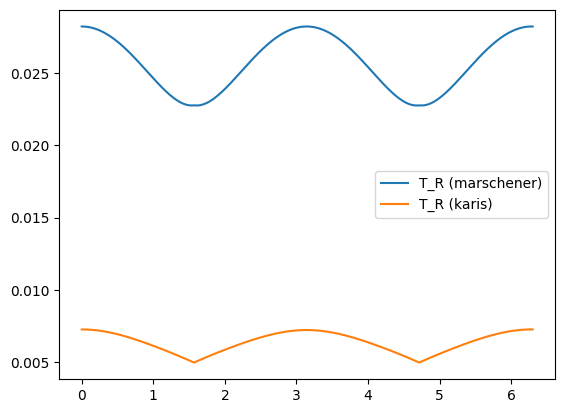

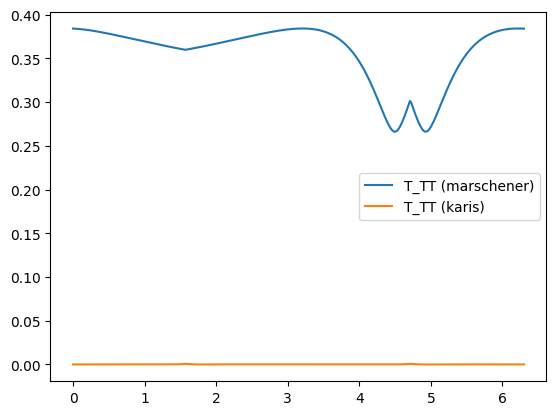

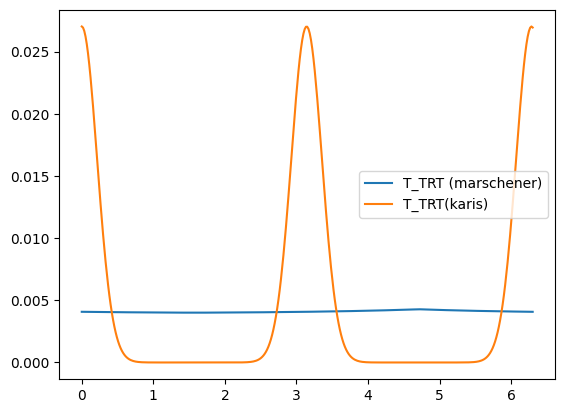

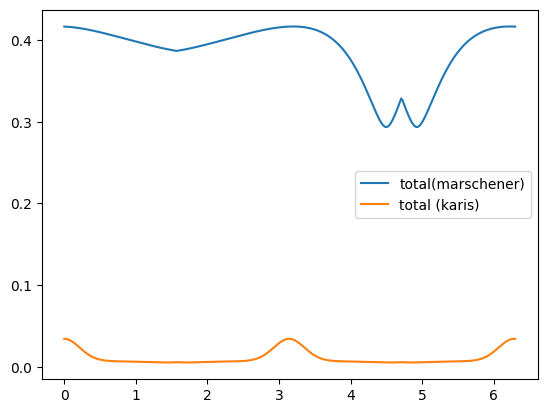

: 

In [21]:
import matplotlib.pyplot as plt

def clamp(x: float, minval: float, maxval: float) -> float:
    return min(max(x, minval), maxval)

def smoothstep(edge0 : float, edge1: float, x: float)-> float:
    t = clamp((x - edge0) / (edge1 - edge0), 0.0, 1.0)
    return t * t * (3.0 - 2.0 * t)

def angle_polynomial(p: int, eta_perpendic: float, h: float) -> float:

    gamma_i: float = math.asin(h)
    c: float = math.asin(1 / eta_perpendic)

    return ((6 * p * c / math.pi) - 2) * gamma_i - 8 * (p * c / (math.pi * math.pi * math.pi)) * gamma_i * gamma_i * gamma_i + p * math.pi


def inv_second_der(p: int, eta_perpendic: float, h: float) -> float:

    gamma_i: float = math.asin(h)
    c: float = math.asin(1 / eta_perpendic)
            
    f: float = ((6 * p * c / math.pi) - 2) - 3 * 8 * (p * c / (math.pi * math.pi * math.pi)) * gamma_i * gamma_i
    df: float = -2 * 3 * 8 * (p * c / (math.pi * math.pi * math.pi)) * gamma_i

    g: float = math.sqrt(1 - h * h)
    dg: float = h / max( g , epsilon)

    return (g * g) / (max( df * g - f * dg , epsilon))


def NP_TRT(phi: float, theta_d: float, eta, absorb: float) -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic

    delta_hM: float = 0.5 # caustic_intensity_limit;
    w_c: float = math.radians(1.5) #caustic_width
    k_G: float = 0.4 #glint_scale_fac
    delta_eta_tick: float = 0.3 #caustic_merge_range

    h_c: float = 0
    # float delta_h, t, phi_c;

    if (eta_perpendic < 2):
        c: float = math.asin(1 / eta_perpendic)
        phi_c = math.sqrt((6 * 2 * c / math.pi - 2) / 
			(3 * 8 * (2 * c / (math.pi * math.pi * math.pi))))
        
        h_c = abs(math.sin(phi_c))

        inv_der_angle: float = inv_second_der(2, eta_perpendic, h_c)

        delta_h = min(delta_hM, 2 * math.sqrt(2 * w_c * inv_der_angle))
        t = 1
    
    else:

        phi_c = 0
        delta_h = delta_hM
        t = 1 - smoothstep(2, 2 + delta_eta_tick, eta_perpendic)
    

    phi_c = angle_polynomial(2, eta_perpendic, h_c)
    res: float = NP(2, phi, theta_d, eta, absorb)
    final_abs: float = absorption(absorb, 2, h_c, eta_perpendic, eta_parallel, theta_d)

    res = res * (1 - t * gausian(phi - phi_c, w_c) / gausian(0, w_c))
    res = res * (1 - t * gausian(phi + phi_c, w_c) / gausian(0, w_c))
    res = res + t * k_G * final_abs * delta_h * (gausian(phi - phi_c, w_c) + gausian(phi + phi_c, w_c))

    return res

def NP_TRT_K(phi: float, theta_d : float, eta: float, hair_color:  float, beta_n: float) -> float:

    scale: float = 1.5 * (1 - beta_n)
    distrib: float = scale * math.exp(scale * (17 * math.cos(phi) - 16.78))

    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic

    a: float = 1/eta_perpendic
    h: float = math.sqrt(3) / 2

    exponent: float = 0.8 / math.cos(theta_d)
    t: float = pow(hair_color, exponent)

    gamma_i: float = math.asin(h)
    gamma_t: float = math.asin(h / eta_perpendic)
    fres: float = fresnel(eta_parallel, eta_perpendic, gamma_i)
    inv_fres: float = fresnel(1 / eta_parallel, 1 / eta_perpendic, gamma_t)

    att: float = (1 - fres) * (1 - fres) * inv_fres * pow(t, 2)
    return att * distrib

tangent = normalise([0, 0, -1])
light = normalise([1, 1, 1])
view = normalise([1, 1, 0])

rot_angles = []

np_r = []
np_r2 = []
np_tt = []
np_tt2 = []
np_trt = []
np_trt2 = []

M_R = []
M_TT = []
M_TRT = []


T_R = []
T_R2 = []

T_TT = []
T_TT2 = []

T_TRT = []
T_TRT2 = []

total = []
total2 = []

total_rot = 0
eta = 1.55
i = 0
absorb = 0.5

long_width_R: float = math.radians(8.0)
long_width_TT: float = long_width_R / 2    
long_width_TRT: float = long_width_R * 2    

long_shift_R: float = math.radians(3.0)   
long_shift_TT: float = -long_shift_R / 2
long_shift_TRT: float = -3 * long_shift_R / 2

while True:
    dotLightTangent: float = dot(light, tangent)
    dotViewTangent: float = dot(view, tangent)
    
    LT_P: list = normalise(minus(light, mult(tangent, dotLightTangent)))
    VT_P: list = normalise(minus(view, mult(tangent, dotViewTangent)))
    
    Normal: list = normalise(LT_P + VT_P)
    Binormal: list = normalise(cross(Normal, tangent))

    theta_r: float = math.acos(dot(VT_P, view))
    theta_i: float = math.acos(dot(LT_P, light))
    theta_d: float = (theta_r - theta_i) / 2
    theta_h: float = (theta_r + theta_i) / 2

    phi_r : float = math.acos(dot(Binormal, VT_P))
    phi_i : float = math.acos(dot(Binormal, LT_P))
    phi : float = phi_r - phi_i

    rot_angles.append(total_rot)

    # np_r.append(NP(0, phi, theta_d, eta, 0))
    np_r.append(NP_R(phi, theta_d, eta))
    np_r2.append(NP_R_K(phi, theta_d, eta, dot(view, light)))

    np_tt.append(NP(1, phi, theta_d, eta, absorb))
    np_tt2.append(NP_TT_K(phi, theta_d, eta, absorb))

    # np_trt.append(NP(2, phi, theta_d, eta, absorb))
    np_trt.append(NP_TRT(phi, theta_d, eta, absorb))
    np_trt2.append(NP_TRT_K(phi, theta_d, eta, absorb, long_width_R))
    

    M_R.append(gausian(theta_h - long_shift_R, long_width_R))
    M_TT.append(gausian(theta_h - long_shift_TT, long_width_TT))
    M_TRT.append(gausian(theta_h - long_shift_TRT, long_width_TRT))

    T_R.append(np_r[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))
    T_R2.append(np_r2[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))

    T_TT.append(np_tt[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))
    T_TT2.append(np_tt2[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))

    T_TRT.append(np_trt[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))
    T_TRT2.append(np_trt2[-1] * M_TRT[-1] / pow(math.cos(theta_d), 2))

    total.append(T_R[-1] + T_TT[-1] + T_TRT[-1])
    total2.append(T_R2[-1] + T_TT2[-1] + T_TRT2[-1])

    if total_rot > math.pi * 2 or i == 3000: break
    view = normalise(rotate_z(view, 0.0175))
    total_rot += 0.0175
    i += 1

plt.plot(rot_angles, T_R, label = "T_R (marschener)") 
plt.plot(rot_angles, T_R2, label = "T_R (karis)") 
plt.legend() 
plt.show()

plt.plot(rot_angles, T_TT, label = "T_TT (marschener)") 
plt.plot(rot_angles, T_TT2, label = "T_TT (karis)") 
plt.legend() 
plt.show()

plt.plot(rot_angles, T_TRT, label = "T_TRT (marschener)") 
plt.plot(rot_angles, T_TRT2, label = "T_TRT(karis)") 
plt.legend() 
plt.show()

plt.plot(rot_angles, total, label = "total(marschener)") 
plt.plot(rot_angles, total2, label = "total (karis)") 
plt.legend() 
plt.show()